# Taller Evaluado 2

En base a los arhivos "Base_Lineal_2019.xlsx", "Base_Lineal_2020.xlsx" y "Base_Lineal_2021.xlsx", los cuales contienen información sobre los permisos de edificación de los años 2019, 2020 y 2021, deben contestas las siguientes preguntas mediante el análisis de los datos y representación gráfica:

Se deben considerar ambos años para todas las respuestas.

Apoyarse en:

[Ejemplo de gráficos Matplotlib](https://matplotlib.org/stable/gallery/index)

[Ejemplo de gráficos Seaborn](https://seaborn.pydata.org/examples/index.html)

Todas las consultas realizadas a ChatGPT o similar, deben ser revidamente documentadas.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt


# Leemos la segunda página de los archivos excel

df_2019 = pd.read_excel('Base_Lineal_2019.xlsx', sheet_name=1)
df_2020 = pd.read_excel('Base_Lineal_2020.xlsx', sheet_name=1)
df_2021 = pd.read_excel('Base_Lineal_2021.xlsx', sheet_name=1)

# Creamos un dataframe con toda la informacion
df = pd.concat([df_2019, df_2020, df_2021])

display(df)

,Año,Mes,Region,Provincia,Cod_comuna,Comuna,folio,dv_folio,Cod_sector,Glosa_sector,...,cod_material2_grupo7,material2_grupo7,cod_material3_grupo7,material3_grupo7,cod_material1_grupo8,material1_grupo8,cod_material2_grupo8,material2_grupo8,cod_material3_grupo8,material3_grupo8
0,2019,1,1,11,1101,Iquique,818,6,2,PRIVADO,...,7.0,GRIFERIA ESTANDAR,9.0,MOBILIARIO COCINA ESTANDAR,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,11,1101,Iquique,819,8,2,PRIVADO,...,5.0,VANITORIO CUBIERTA RESINA,7.0,GRIFERIA ESTANDAR,4.0,AIRE ACONDICIONADO INYEC.- EXTRACCION,5.0,SISTEMA ALARMA,6.0,CIRCUITO CERRADO TV
2,2019,1,1,11,1101,Iquique,864,4,2,PRIVADO,...,7.0,GRIFERIA ESTANDAR,NaN,NaN,5.0,SISTEMA ALARMA,NaN,NaN,NaN,NaN
3,2019,1,1,11,1101,Iquique,865,6,2,PRIVADO,...,7.0,GRIFERIA ESTANDAR,9.0,MOBILIARIO COCINA ESTANDAR,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,11,1101,Iquique,866,8,2,PRIVADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36435,2021,12,16,163,16305,San Nicolás,16305413,5,2,PRIVADO,...,7.0,GRIFERIA ESTANDAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36436,2021,12,16,163,16305,San Nicolás,16305414,7,2,PRIVADO,...,7.0,GRIFERIA ESTANDAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36437,2021,12,16,163,16305,San Nicolás,16305423,8,2,PRIVADO,...,6.0,GRIFERIA ECONOMICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36438,2021,12,16,163,16305,San Nicolás,16305426,5,2,PRIVADO,...,NaN,NaN,NaN,NaN,15.0,OTRA especificar,NaN,NaN,NaN,NaN


## Pregunta 1: Para los tres años ¿Existe relación entre la cantidad de permisos de edificación y la cantidad de habitantes por región?

Utilización datos de cantidad de habitantes por región según:
[Cantidad de habitantes por región](https://es.wikipedia.org/wiki/Anexo:Regiones_de_Chile_por_poblaci%C3%B3n)

Además de considerar que, en los excel, la numeración de las regiones es:

 1 = Región de Tarapacá

 2 = Región de Antofagasta

 3 = Región de Atacama

 4 = Región de Coquimbo

 5 = Región de Valparaíso

 6 = Región del Libertador General Bernardo O’Higgins

 7 = Región del Maule

 8 = Región del Biobío

 9 = Región de La Araucanía

 10 = Región de Los Lagos

 11 = Región Aysén del General Carlos Ibáñez del Campo

 12 = Región de Magallanes y Antártica Chilena

 13 = Región Metropolitana de Santiago

 14 = Región de Los Ríos

 15 = Región de Arica y Parinacota

 16 = Región de Ñuble

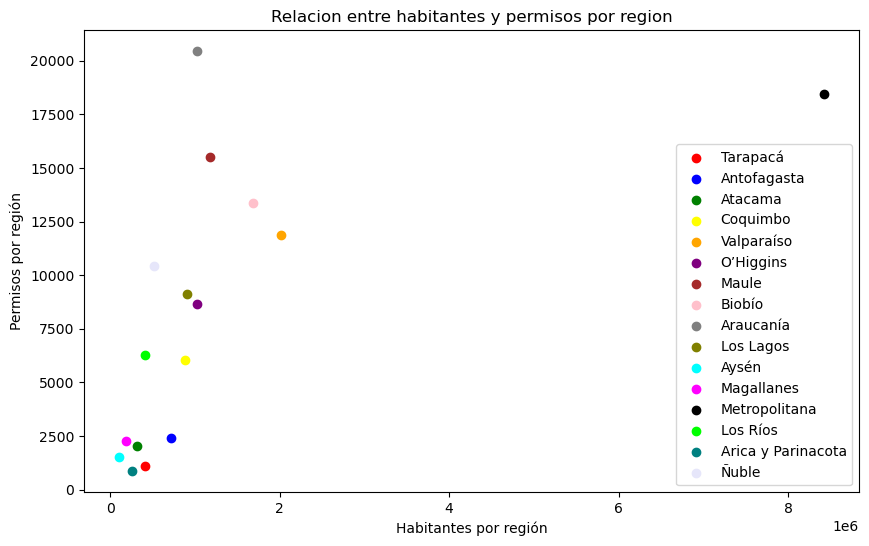

In [148]:

# Creamos un diccionario con 
region_population = {
    'Tarapacá': 406287,
    'Antofagasta': 714142,
    'Atacama': 319992,
    'Coquimbo': 879267,
    'Valparaíso': 2010849,
    'O’Higgins': 1025586,
    'Maule': 1171982,
    'Biobío': 1681225,
    'Araucanía': 1028201,
    'Los Lagos': 907429,
    'Aysén': 108306,
    'Magallanes': 182217,
    'Metropolitana': 8420729,
    'Los Ríos': 411205,
    'Arica y Parinacota': 259802,
    'Ñuble': 521711
}

# Creamos una lista con el numero de registros por region
registros_per_region = [len(df[df['Region'] == i]) for i in range(1, 17)]

# Creamos una lista con el nombre de cada region

region_names = ['Tarapacá', 'Antofagasta', 'Atacama', 'Coquimbo', 'Valparaíso', 'O’Higgins', 'Maule', 'Biobío', 'Araucanía', 'Los Lagos', 'Aysén', 'Magallanes', 'Metropolitana', 'Los Ríos', 'Arica y Parinacota', 'Ñuble']


# Lista de colores para cada region
region_colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'black', 'lime', 'teal', 'lavender']

plt.figure(figsize=(10, 6))
for i in range(16):
    plt.scatter(region_population[region_names[i]], registros_per_region[i], color=region_colors[i])

plt.title('Relacion entre habitantes y permisos por region')
plt.xlabel('Habitantes por región')
plt.ylabel("Permisos por región")
plt.legend(region_names)
plt.show()


## Pregunta 2: ¿Existen meses con mayor demanda de permisos de edificación? realizar el análisis para los tres años.

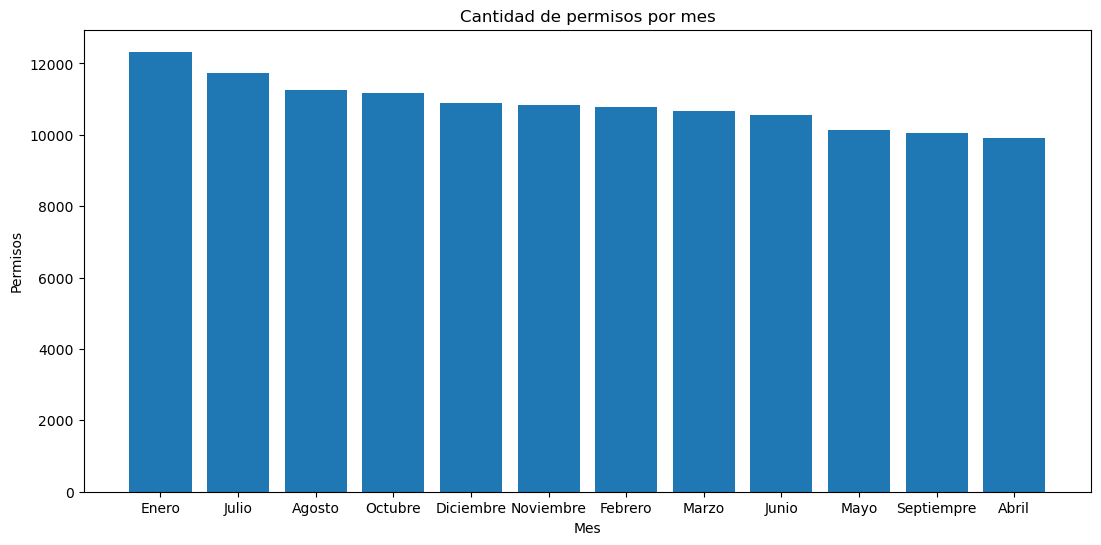

In [83]:

# create a list with the name of each month
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiempre', 'Octubre', 'Noviembre', 'Diciembre']

# create a list with the amount of registers per month
registers_per_month = [len(df[df['Mes'] == i]) for i in range(1, 13)]

# sort the data in descending order
month_names, registers_per_month = zip(*sorted(zip(month_names, registers_per_month), key=lambda x: x[1], reverse=True))

# create a figure
plt.figure(figsize=(13, 6))

# create a bar plot
plt.bar(month_names, registers_per_month)

# set the title and labels
plt.title('Cantidad de permisos por mes')
plt.xlabel('Mes')
plt.ylabel('Permisos')

# show the plot
plt.show()






## Pregunta 3: ¿Cual es la relación entre que la cantidad de permisos de edificación en función del área (Urbana o Rural) y el tipo de permiso (columna tipo_permiso)?

tipo_permiso,AMPLIACIÓN,OBRA NUEVA,REGULARIZACIÓN AMPLIACIÓN,REGULARIZACIÓN OBRA NUEVA
cod_area,,,,
1,23462,24544,29376,16817
2,5635,20916,3085,6497


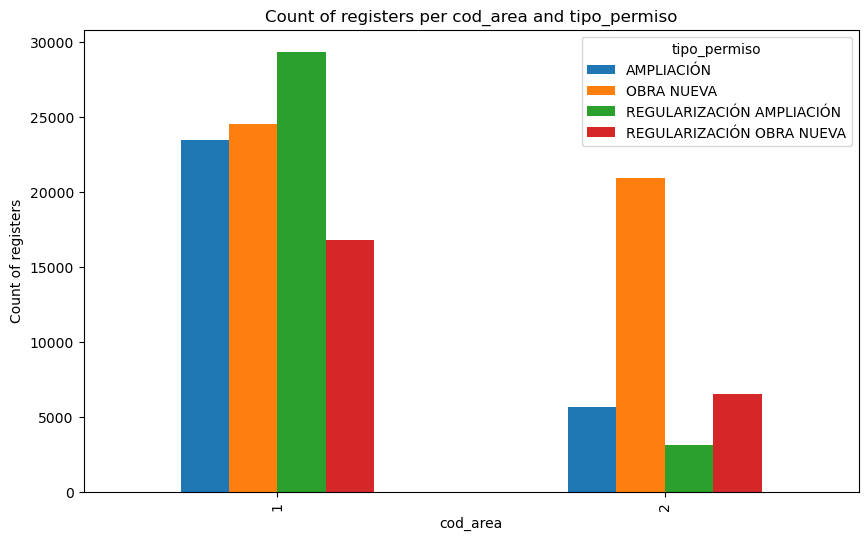

In [84]:


# Creamos una tabla pivot con la cuenta de registros por codigo de area y tipo de permiso
pivot_table = pd.pivot_table(df, values='folio', index=['cod_area'], columns=['tipo_permiso'], aggfunc=len, fill_value=0)

# Mostramos la tabla con los valores
display(pivot_table)

# Barplot de la tabla pivot
pivot_table.plot(kind='bar', figsize=(10,6))
plt.title('Count of registers per cod_area and tipo_permiso')
plt.xlabel('cod_area')
plt.ylabel('Count of registers')
plt.show()


## Pregunta 4: ¿Podemos afirmar que los permisos de edificación en zonas rurales están relacionados con instalaciones (Agua, alcantarillado y electricidad) del tipo "Sistema individual" y "sistema privado colectivo"?


SISTEMA INDIVIDUAL        14791
RED PUBLICA               14359
SIST.PRIVADO COLECTIVO     6983
Name: agua_p, dtype: int64


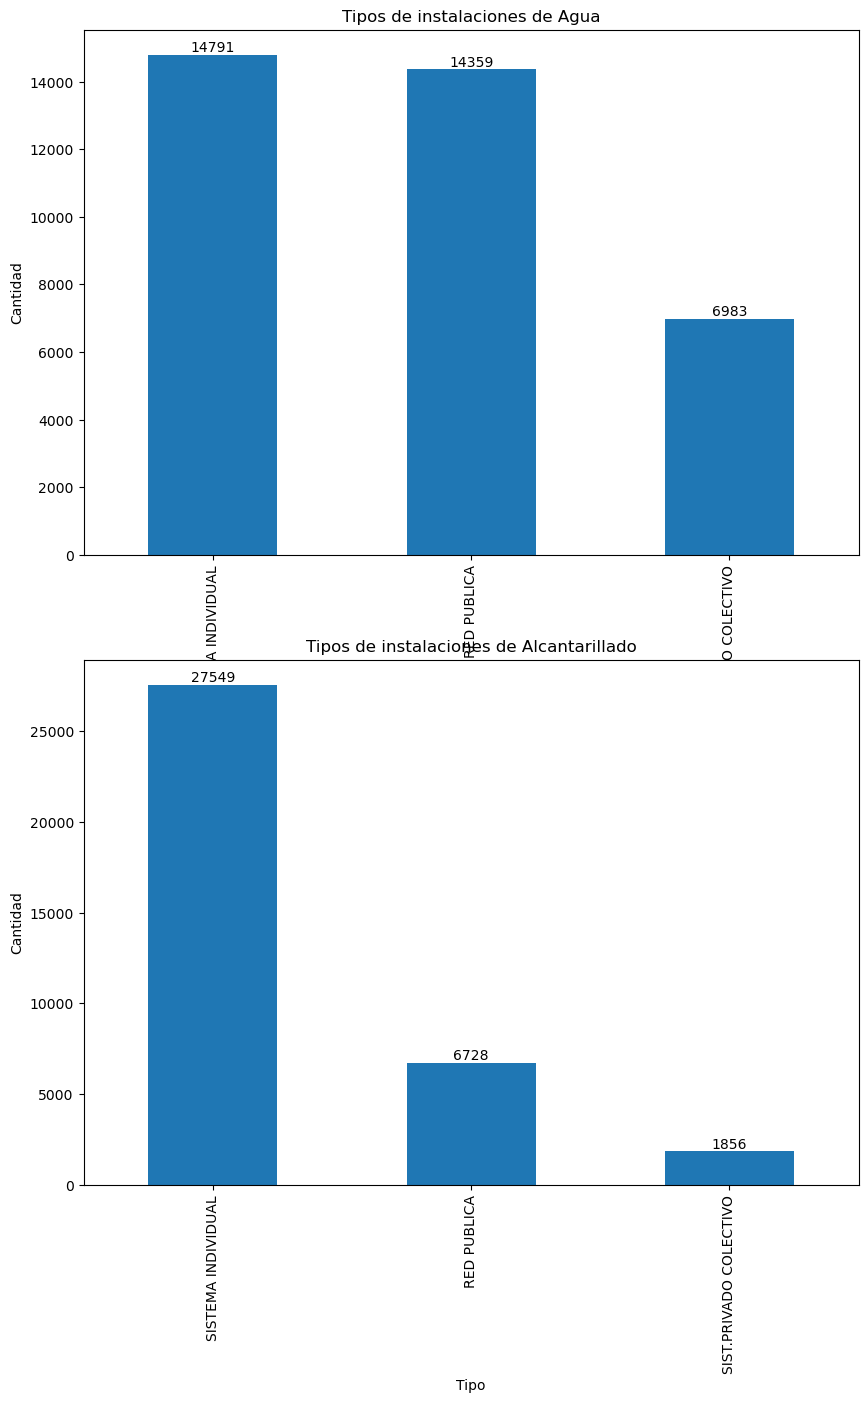

SISTEMA INDIVIDUAL        27549
RED PUBLICA                6728
SIST.PRIVADO COLECTIVO     1856
Name: alcantarillado, dtype: int64


In [91]:
# Cortar la tabla a solamente los que tienen cod_area = 2 (Rurales)

df_4 = df[df['cod_area'] == 2]

# count the values of each column
agua_p_counts = df_4['agua_p'].value_counts()
alcantarillado_counts = df_4['alcantarillado'].value_counts()
electricidad_counts = df_4['electricidad'].value_counts()


fig, axs = plt.subplots(2, figsize=(10, 15))

# Agua_p
agua_p_counts.plot(kind='bar',  ax=axs[0])
axs[0].set_title('Tipos de instalaciones de Agua')
axs[0].set_xlabel('Tipo')
axs[0].set_ylabel('Cantidad')
# add the value on top of each bar
for i, v in enumerate(agua_p_counts):
    axs[0].text(i, v, str(v), ha='center', va='bottom')

print (agua_p_counts)


# Alcantarillado
alcantarillado_counts.plot(kind='bar', ax=axs[1])
axs[1].set_title('Tipos de instalaciones de Alcantarillado')
axs[1].set_xlabel('Tipo')
axs[1].set_ylabel('Cantidad')
# add the value on top of each bar
for i, v in enumerate(alcantarillado_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

print (alcantarillado_counts)



Como podemos notar, la cantidad de permisos de tipo "sistema individual" y "sistema privado colectivo" es superior tanto en las instalaciones de agua y alcantarillado. Para el caso de la columna "electricidad" no tenemos un criterio similar, pero mostramos el mismo gráfico

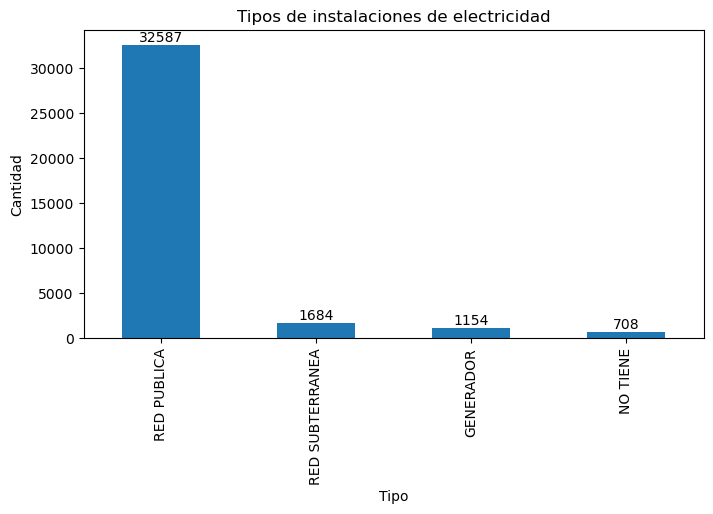

In [75]:

# Electricidad
electricidad_counts.plot(kind='bar', figsize=(8, 4))
plt.title('Tipos de instalaciones de electricidad')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')

# add the value on top of each bar
for i, v in enumerate(electricidad_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


## Pregunta 5: Para cada uno de los tres años ¿Cuales son las 10 comunas que tienen una mayor cantidad de permisos de edificación con num_pisos mayores a 5?

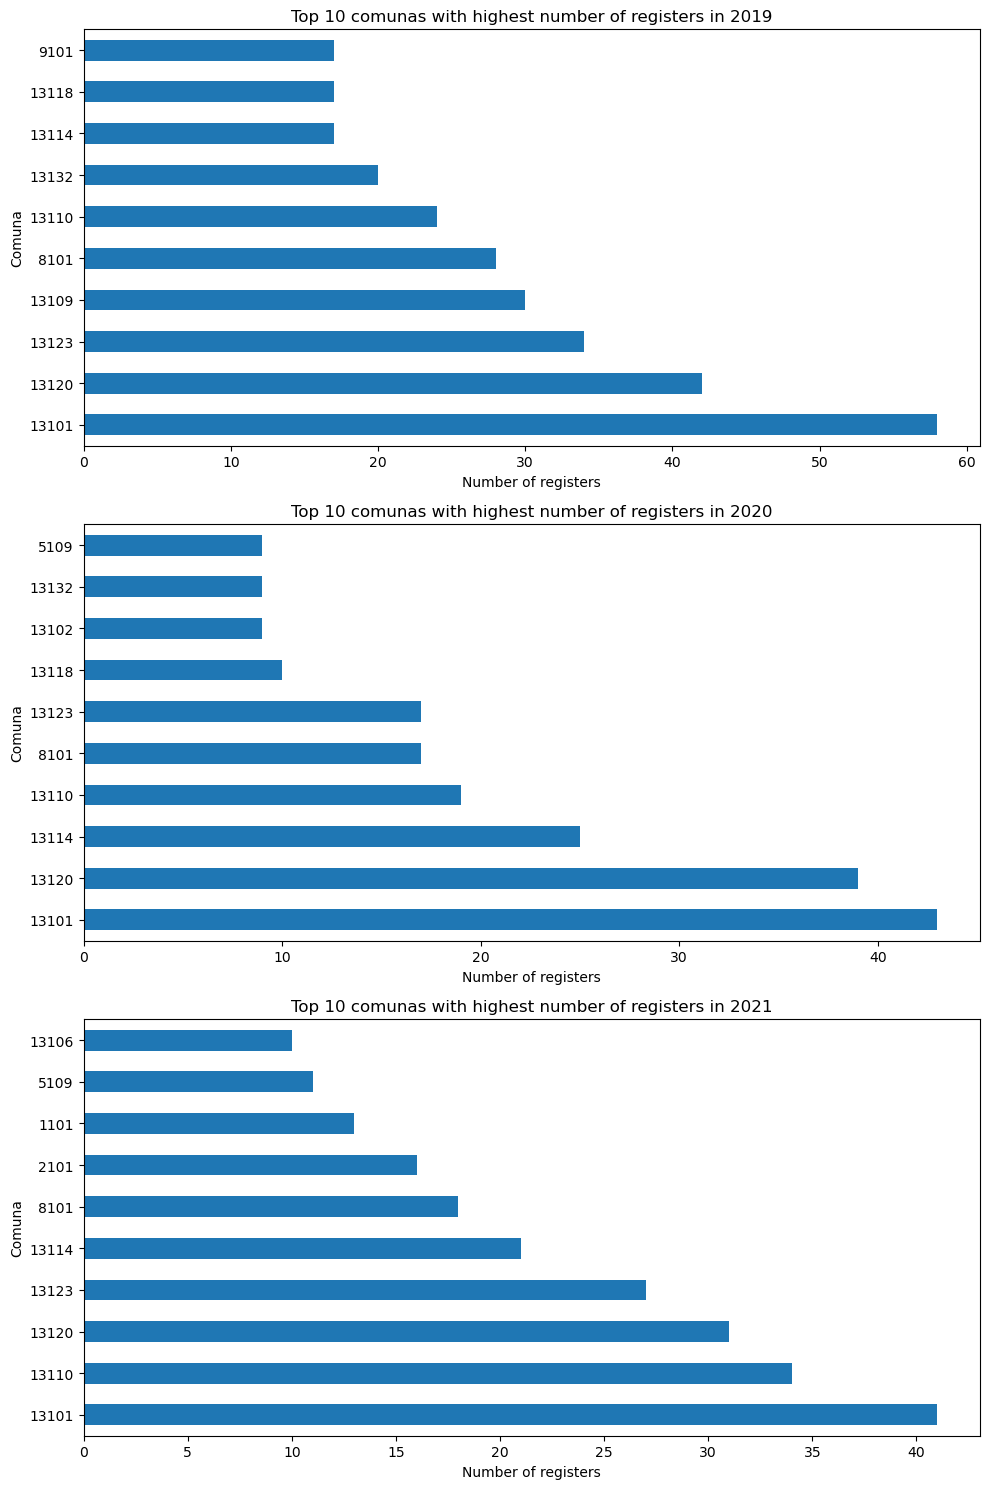

In [76]:
# crear un nuevo dataframe que contenga solo los registros con num_pisos mayores a 5
df_pisos_mayores_5_2019 = df_2019[df_2019['num_pisos'] > 5]
df_pisos_mayores_5_2020 = df_2020[df_2020['num_pisos'] > 5]
df_pisos_mayores_5_2021 = df_2021[df_2021['num_pisos'] > 5]

# agrupar los registros por comuna y contar la cantidad de registros por comuna
comunas_counts_2019 = df_pisos_mayores_5_2019.groupby('Cod_comuna')['Region'].count()
comunas_counts_2020 = df_pisos_mayores_5_2020.groupby('Cod_comuna')['Region'].count()
comunas_counts_2021 = df_pisos_mayores_5_2021.groupby('Cod_comuna')['Region'].count()

# ordenar las comunas por la cantidad de registros en orden descendente
comunas_counts_2019 = comunas_counts_2019.sort_values(ascending=False)
comunas_counts_2020 = comunas_counts_2020.sort_values(ascending=False)
comunas_counts_2021 = comunas_counts_2021.sort_values(ascending=False)

# seleccionar las 10 comunas con mayor cantidad de registros
top_10_comunas_2019 = comunas_counts_2019.head(10)
top_10_comunas_2020 = comunas_counts_2020.head(10)
top_10_comunas_2021 = comunas_counts_2021.head(10)

# create a figure
fig, axs = plt.subplots(3, figsize=(10, 15))

# plot the top 10 comunas for each year
top_10_comunas_2019.plot(kind='barh', ax=axs[0])
top_10_comunas_2020.plot(kind='barh', ax=axs[1])
top_10_comunas_2021.plot(kind='barh', ax=axs[2])

# set the title and labels for each subplot
axs[0].set_title('Top 10 comunas with highest number of registers in 2019')
axs[1].set_title('Top 10 comunas with highest number of registers in 2020')
axs[2].set_title('Top 10 comunas with highest number of registers in 2021')

axs[0].set_xlabel('Number of registers')
axs[1].set_xlabel('Number of registers')
axs[2].set_xlabel('Number of registers')

axs[0].set_ylabel('Comuna')
axs[1].set_ylabel('Comuna')
axs[2].set_ylabel('Comuna')



# adjust the layout
plt.tight_layout()

# show the plot
plt.show()



## Pregunta 6: Para cada uno de los tres años ¿Cuáles son las comunas que tienen una mayor cantidad de permisos de edificación de "OBRA NUEVA" para cada región?

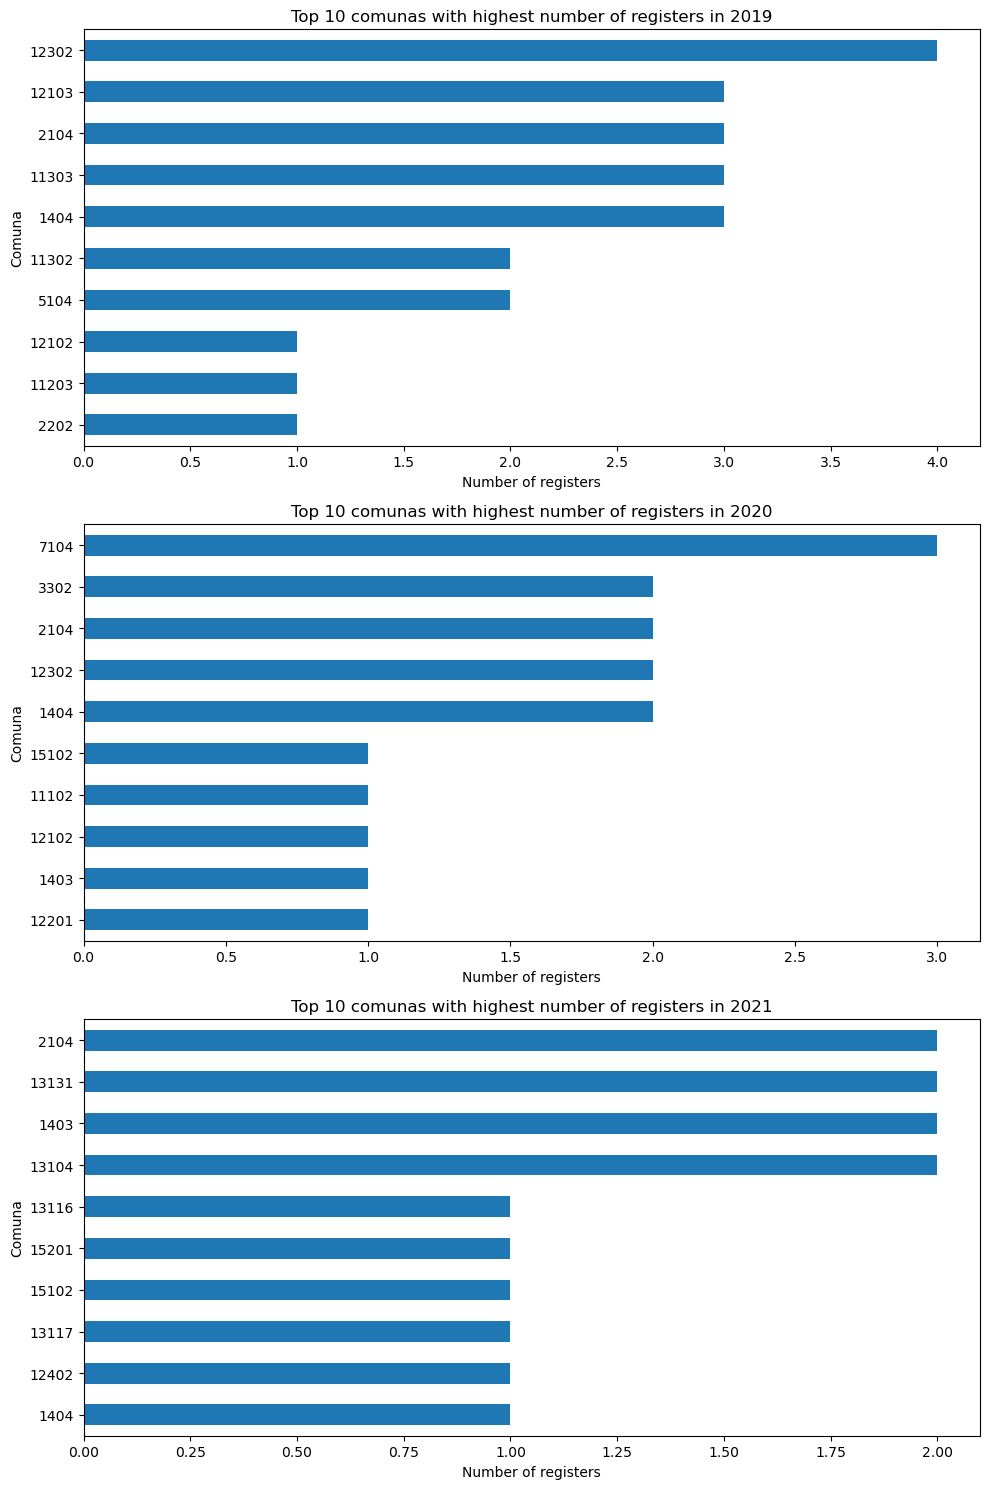

In [107]:
df_5_2019 = df_2019[df_2019['tipo_permiso'] == "OBRA NUEVA"]
df_5_2020 = df_2020[df_2020['tipo_permiso'] == "OBRA NUEVA"]
df_5_2021 = df_2021[df_2021['tipo_permiso'] == "OBRA NUEVA"]

# agrupar los registros por comuna y contar la cantidad de registros por comuna
comunas_df_5_2019 = df_5_2019.groupby('Cod_comuna')['folio'].count()
comunas_df_5_2019 = comunas_df_5_2019.sort_values(ascending=True)
top_10_comunas_2019 = comunas_df_5_2019.head(10)

comunas_df_5_2020 = df_5_2020.groupby('Cod_comuna')['folio'].count()
comunas_df_5_2020 = comunas_df_5_2020.sort_values(ascending=True)
top_10_comunas_2020 = comunas_df_5_2020.head(10)

comunas_df_5_2021 = df_5_2021.groupby('Cod_comuna')['folio'].count()
comunas_df_5_2021 = comunas_df_5_2021.sort_values(ascending=True)
top_10_comunas_2021 = comunas_df_5_2021.head(10)


# create a figure
fig, axs = plt.subplots(3, figsize=(10, 15))

top_10_comunas_2019.plot(kind='barh', ax=axs[0])
axs[0].set_title('Top 10 comunas with highest number of registers in 2019')
axs[0].set_xlabel('Number of registers')
axs[0].set_ylabel('Comuna')

top_10_comunas_2020.plot(kind='barh', ax=axs[1])
axs[1].set_title('Top 10 comunas with highest number of registers in 2020')
axs[1].set_xlabel('Number of registers')
axs[1].set_ylabel('Comuna')

top_10_comunas_2021.plot(kind='barh', ax=axs[2])
axs[2].set_title('Top 10 comunas with highest number of registers in 2021')
axs[2].set_xlabel('Number of registers')
axs[2].set_ylabel('Comuna')


# adjust the layout
plt.tight_layout()

# show the plot
plt.show()


## Pregunta 7: ¿Que materialidad de los muros (material1_grupo1) son más comunes según región?

In [147]:
# Revisamos que tipos materiales pueden aparecer en la columna

tipos_de_materiales = df['material1_grupo1'].unique()

print(tipos_de_materiales)

# Agrupamos por region y material1_grupo1 y contamos la cantidad de registros

df_6 = df.groupby(['Region', 'material1_grupo1']).size().reset_index(name='counts')

print(df_6)



['BLOQUE CEMENTO' 'HORMIGON' 'PANEL FERRO CEMENTO'
 'METAL PANEL PREFORMADO' 'MADERA' 'LADRILLO MAQUINA' 'PIEDRA'
 'LADRILLO ARTESANAL' 'ADOBE' 'PANEL POLIEST. EXP. ARMADO ESTUCABLE'
 'METAL - VIDRIO (Muro Cortina)' 'OTRA (Muros - Cerramentos)']
     Region                      material1_grupo1  counts
0         1                                 ADOBE       1
1         1                        BLOQUE CEMENTO     588
2         1                              HORMIGON     122
3         1                    LADRILLO ARTESANAL       9
4         1                      LADRILLO MAQUINA      35
..      ...                                   ...     ...
151      16                                MADERA    7419
152      16         METAL - VIDRIO (Muro Cortina)       1
153      16                METAL PANEL PREFORMADO     279
154      16                   PANEL FERRO CEMENTO     171
155      16  PANEL POLIEST. EXP. ARMADO ESTUCABLE       1

[156 rows x 3 columns]


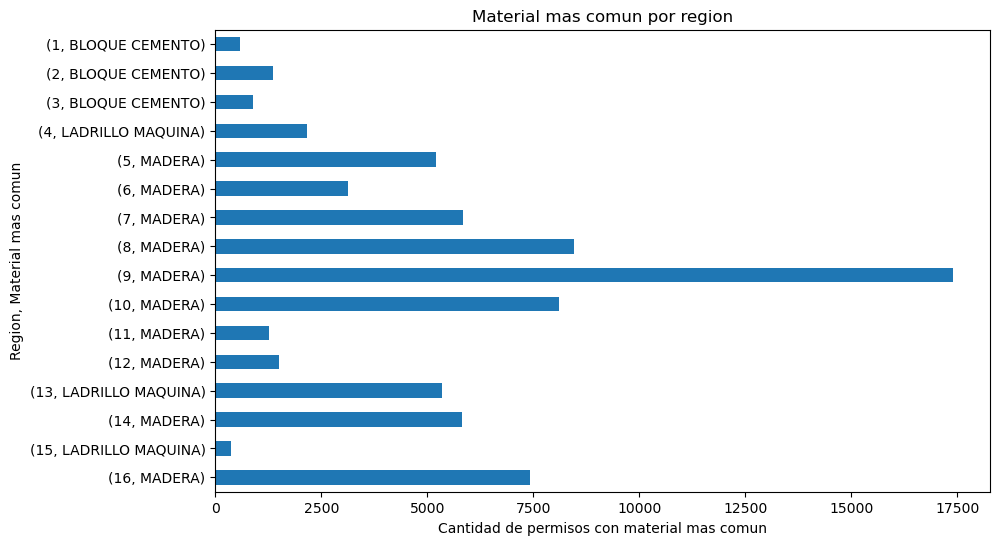

In [149]:


df_7 = df.groupby(['Region', 'material1_grupo1']).size().groupby(level=0).nlargest(1)
df_7 = df_7.reset_index(level=0, drop=True)

# RRevertimos el orden de las filas para imprimir en orden de regiones

df_7 = df_7.iloc[::-1]
plt.figure(figsize=(10, 6))


df_7.plot(kind='barh', figsize=(10, 6))
plt.title('Material mas comun por region')
plt.xlabel('Cantidad de permisos con material mas comun')
plt.ylabel('Region, Material mas comun')

# show the plot
plt.show()
